In [1]:
import os
import urllib.request
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from robustipy.models import OLSRobust
from robustipy.utils import get_colormap_colors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import seaborn as sns

n_draws = 1000

In [2]:
def download_and_unzip(url: str, output_dir: str) -> None:
    """
    Downloads a ZIP file from the specified URL and extracts its contents.

    Parameters:
    - url (str): The URL of the ZIP file.
    - output_dir (str): The directory where the extracted files will be placed.

    The function performs the following steps:
    1. Download the ZIP file, represented as a binary object Z.
    2. Create the output directory if it does not exist.
    3. Extract the contents of the ZIP file into output_dir.
    4. Remove the temporary ZIP file.
    """
    
    # Define a temporary filename for storing the downloaded ZIP file.
    zip_filename = "temp_download.zip"
    
    # Step 1: Download the file.
    print(f"Downloading file from {url} ...")
    try:
        urllib.request.urlretrieve(url, zip_filename)
        print("Download complete.")
    except Exception as e:
        print(f"An error occurred during download: {e}")
        return
    
    # Step 2: Ensure that the output directory exists.
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory: {output_dir}")
    else:
        print(f"Directory already exists: {output_dir}")
    
    # Step 3: Extract the ZIP file's contents.
    print(f"Extracting contents to {output_dir} ...")
    try:
        with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
            zip_ref.extractall(output_dir)
        print("Extraction complete.")
    except zipfile.BadZipFile as e:
        print(f"Error: The downloaded file is not a valid zip file: {e}")
    except Exception as e:
        print(f"An unexpected error occurred during extraction: {e}")
    
    # Step 4: Clean up by removing the temporary ZIP file.
    try:
        os.remove(zip_filename)
        print("Temporary file removed.")
    except Exception as e:
        print(f"Warning: Could not remove the temporary file: {e}")

# Define the URL and the directory where the extracted contents will be stored.
zip_url = "https://s3.wasabisys.com/zipballs.researchbox.org/ResearchBox_3124.zip"
extraction_directory = "data/input/ResearchBox_3124_extracted"

# Execute the download and extraction process.
download_and_unzip(zip_url, extraction_directory)


Download complete.
Directory already exists: data/input/ResearchBox_3124_extracted
Extracting contents to data/input/ResearchBox_3124_extracted ...
Extraction complete.
Temporary file removed.


In [3]:
def figure_plotter(results_promo_published, results_preven_published, results_promo, results_preven, fig_name):

    colors = get_colormap_colors('Spectral_r', 5, brightness_threshold=0.8)
    plt.rcParams['font.family'] = 'Helvetica'
    df1a = results_promo_published.summary_df.sort_values('median').reset_index(drop=True)
    df1b = results_preven_published.summary_df.sort_values('median').reset_index(drop=True)
    df2a = results_promo.summary_df.sort_values('median').reset_index(drop=True)
    df2b = results_preven.summary_df.sort_values('median').reset_index(drop=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


    ax1.plot(df1a.index, df1a['median'], label='Promotion Condition', color=colors[0])
    ax1.fill_between(df1a.index, df1a['ci_down'], df1a['ci_up'], color=colors[0], alpha=0.15)
    ax1.plot(df1b.index, df1b['median'], label='Prevention Condition', color=colors[3])
    ax1.fill_between(df1b.index, df1b['ci_down'], df1b['ci_up'], color=colors[3], alpha=0.15)
    ax1.set_xlabel('Model Rank', fontsize=16)
    ax1.set_ylabel('Estimate', fontsize=16)
    ax1.set_title('a.', loc='left', fontsize=18, y=1.025, x=-0.075)
    ax1.spines['bottom'].set_position(('outward', 10))
    ax1.spines['left'].set_position(('outward', 10))
    ax1.legend()
    ax1.tick_params(labelsize=12)
    ax1.set_ylim(-0.6, 0.625)
    ax1.set_xlim(0, ax1.get_xlim()[1])
    ax1.grid(True, axis='both', linestyle=(0, (2, 6)),
             linewidth=0.74, alpha=0.3, color='k', zorder=3)

    ax2.plot(df2a.index, df2a['median'], label='Promotion Condition', color=colors[0])
    ax2.fill_between(df2a.index, df2a['ci_down'], df2a['ci_up'], color=colors[0], alpha=0.15)
    ax2.plot(df2b.index, df2b['median'], label='Prevention Condition', color=colors[3])
    ax2.fill_between(df2b.index, df2b['ci_down'], df2b['ci_up'], color=colors[3], alpha=0.15)
    ax2.set_ylabel('Estimate', fontsize=16)
    ax2.set_xlabel('Model Rank', fontsize=16)
    ax2.legend()
    ax2.spines['bottom'].set_position(('outward', 10))
    ax2.spines['left'].set_position(('outward', 10))
    ax2.set_title('b.', loc='left', fontsize=18, y=1.025, x=-0.075)
    ax2.tick_params(labelsize=12)
    ax2.set_ylim(-0.6, 0.625)
    ax2.set_xlim(0, ax2.get_xlim()[1])
    ax2.grid(True, axis='both', linestyle=(0, (2, 6)),
             linewidth=0.74, alpha=0.3, color='k', zorder=3)



    legend_elements1 = [Patch(facecolor=colors[0], edgecolor='k',
                              label=r'Promotion (CI)', alpha=0.7),
                        Line2D([0], [0], color=colors[0], lw=1, linestyle='-',
                               label=r'Promotion (Med.)', alpha=0.7),
                        Patch(facecolor=colors[3], edgecolor='k',
                              label=r'Prevention (CI)', alpha=0.7),
                        Line2D([0], [0], color=colors[3], lw=1, linestyle='-',
                               label=r'Prevention (Med.)', alpha=0.7)]

    ax1.legend(handles=legend_elements1, loc='upper left', frameon=True,
               fontsize=9, framealpha=1, facecolor='w', ncols=2,
               edgecolor=(0, 0, 0, 1), title='Reconstructed Data',
               )

    legend_elements2 = [Patch(facecolor=colors[0], edgecolor='k',
                              label=r'Promotion (CI)', alpha=0.7),
                        Line2D([0], [0], color=colors[0], lw=1, linestyle='-',
                               label=r'Promotion (Med.)', alpha=0.7),
                        Patch(facecolor=colors[3], edgecolor='k',
                              label=r'Prevention (CI)', alpha=0.7),
                        Line2D([0], [0], color=colors[3], lw=1, linestyle='-',
                               label=r'Prevention (Med.)', alpha=0.7)]
    ax2.legend(handles=legend_elements2, loc='upper left', frameon=True,
               fontsize=9, framealpha=1, facecolor='w', ncols=2,
               edgecolor=(0, 0, 0, 1), title='Published Data',
               )
    plt.tight_layout()
    sns.despine()
    plt.savefig("./figures/gino/" + fig_name + '.pdf', bbox_inches='tight')
    plt.savefig("./figures/gino/" + fig_name + '.png', bbox_inches='tight', dpi=400)
    plt.savefig("./figures/gino/" + fig_name + '.svg', bbox_inches='tight')
    

In [4]:
box = './data/input/ResearchBox_3124_extracted/ResearchBox 3124/'
data = pd.read_csv(box + " Data/Gino et al. (2020) Study 3A Posted Data.csv")
corrected_data = pd.read_csv(box + " Data/Data Cleaned & Re-constructed.csv")

## Comparison using moral impurity items

In [5]:
y = ['moralImpurity_1',
     'moralImpurity_2',
     'moralImpurity_3',
     'moralImpurity_4',
     'moralImpurity_5',
     'moralImpurity_6',
     'moralImpurity_7']
x = [
    'promotion_Dummy',
    'prevention_dummy',
    #'control_Dummy'
     ]
c= ['age',
    'male']

gino_promo_published = OLSRobust(y=y, x=x, data=data)
gino_promo_published.fit(controls=c, draws=n_draws)
gino_results_promo_published = gino_promo_published.get_results()

Output()

running with n_cpu: 31
Calculating Composite Ys


/home/jinx/anaconda3/lib/python3.12/site-packages/robustipy/models.py:649: MissingValueWarning: Missing values found in data. Listwise deletion will be applied
  warnings.warn('Missing values found in data. Listwise deletion will be applied',


Output()

In [6]:
y = ['moralImpurity_1',
     'moralImpurity_2',
     'moralImpurity_3',
     'moralImpurity_4',
     'moralImpurity_5',
     'moralImpurity_6',
     'moralImpurity_7']
x = [
    'prevention_dummy',
    'promotion_Dummy',
    #'control_Dummy'
     ]
c= ['age',
    'male']

gino_preven_published = OLSRobust(y=y, x=x, data=data)
gino_preven_published.fit(controls=c, draws=n_draws)
gino_results_preven_published = gino_preven_published.get_results()

Output()

running with n_cpu: 31
Calculating Composite Ys


/home/jinx/anaconda3/lib/python3.12/site-packages/robustipy/models.py:649: MissingValueWarning: Missing values found in data. Listwise deletion will be applied
  warnings.warn('Missing values found in data. Listwise deletion will be applied',


Output()

In [7]:
y = ['dirty_orig',
     'tainted_orig',
     'inauthentic_orig',
     'ashamed_orig',
     'wrong_orig',
     'unnatural_orig',
     'impure_orig']
x = [
    'promotion_Dummy',
    'prevention_dummy',
    #'control_Dummy'
     ]
c= ['age',
    'male']

gino_promo = OLSRobust(y=y, x=x, data=corrected_data)
gino_promo.fit(controls=c, draws=n_draws)
gino_results_promo = gino_promo.get_results()

Output()

running with n_cpu: 31
Calculating Composite Ys


/home/jinx/anaconda3/lib/python3.12/site-packages/robustipy/models.py:649: MissingValueWarning: Missing values found in data. Listwise deletion will be applied
  warnings.warn('Missing values found in data. Listwise deletion will be applied',


Output()

In [8]:
y = ['dirty_orig',
     'tainted_orig',
     'inauthentic_orig',
     'ashamed_orig',
     'wrong_orig',
     'unnatural_orig',
     'impure_orig']
x = [
    'prevention_dummy',
    'promotion_Dummy',
    #'control_Dummy'
    ]
c= ['age',
    'male']

gino_preven = OLSRobust(y=y, x=x, data=corrected_data)
gino_preven.fit(controls=c, draws=n_draws)
gino_results_preven = gino_preven.get_results()

Output()

running with n_cpu: 31
Calculating Composite Ys


/home/jinx/anaconda3/lib/python3.12/site-packages/robustipy/models.py:649: MissingValueWarning: Missing values found in data. Listwise deletion will be applied
  warnings.warn('Missing values found in data. Listwise deletion will be applied',


Output()

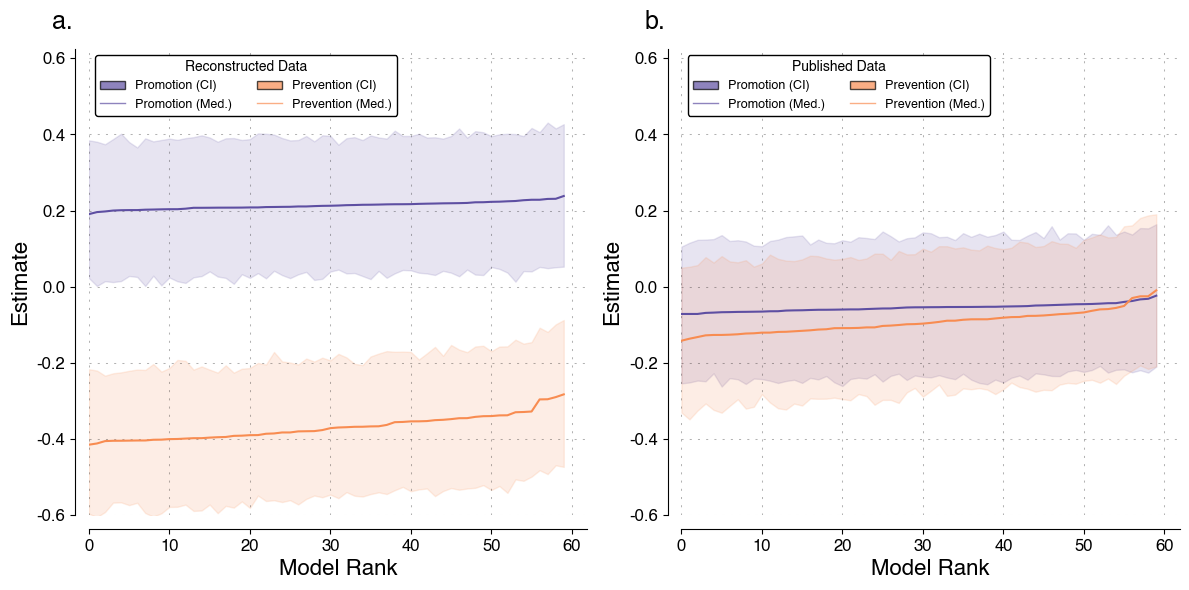

In [16]:
figure_plotter(gino_results_promo_published, gino_results_preven_published,
               gino_results_promo, gino_results_preven, 'gino_figure_1')

## Comparison Using Networking Intention Items

In [10]:
y = ['netIntentions_1',
     'netIntentions_2',
     'netIntentions_3',
     'netIntentions_4']
x = [
    'promotion_Dummy',
    'prevention_dummy',
    #'control_Dummy'
     ]
c= ['age',
    'male']

gino_promo_published = OLSRobust(y=y, x=x, data=data)
gino_promo_published.fit(controls=c, draws=n_draws)
gino_results_promo_published = gino_promo_published.get_results()

Output()

running with n_cpu: 31
Calculating Composite Ys


/home/jinx/anaconda3/lib/python3.12/site-packages/robustipy/models.py:649: MissingValueWarning: Missing values found in data. Listwise deletion will be applied
  warnings.warn('Missing values found in data. Listwise deletion will be applied',


Output()

In [11]:
y = ['netIntentions_1',
     'netIntentions_2',
     'netIntentions_3',
     'netIntentions_4']
x = [
    'prevention_dummy',
    'promotion_Dummy',
    #'control_Dummy'
     ]
c= ['age',
    'male']

gino_preven_published = OLSRobust(y=y, x=x, data=data)
gino_preven_published.fit(controls=c, draws=n_draws)
gino_results_preven_published = gino_preven_published.get_results()

Output()

running with n_cpu: 31
Calculating Composite Ys


/home/jinx/anaconda3/lib/python3.12/site-packages/robustipy/models.py:649: MissingValueWarning: Missing values found in data. Listwise deletion will be applied
  warnings.warn('Missing values found in data. Listwise deletion will be applied',


Output()

In [12]:
y = ['net_intent1_orig',
     'net_intent2_orig',
     'net_intent3_orig',
     'net_intent4_orig']
x = [
    'promotion_Dummy',
    'prevention_dummy',
    #'control_Dummy'
     ]
c= ['age',
    'male']

gino_promo = OLSRobust(y=y, x=x, data=corrected_data)
gino_promo.fit(controls=c, draws=n_draws)
gino_results_promo = gino_promo.get_results()

Output()

running with n_cpu: 31
Calculating Composite Ys


/home/jinx/anaconda3/lib/python3.12/site-packages/robustipy/models.py:649: MissingValueWarning: Missing values found in data. Listwise deletion will be applied
  warnings.warn('Missing values found in data. Listwise deletion will be applied',


Output()

In [13]:
y = ['net_intent1_orig',
     'net_intent2_orig',
     'net_intent3_orig',
     'net_intent4_orig']
x = [
    'prevention_dummy',
    'promotion_Dummy',
    #'control_Dummy'
     ]
c= ['age',
    'male']

gino_preven = OLSRobust(y=y, x=x, data=corrected_data)
gino_preven.fit(controls=c, draws=n_draws)
gino_results_preven = gino_preven.get_results()

Output()

running with n_cpu: 31
Calculating Composite Ys


/home/jinx/anaconda3/lib/python3.12/site-packages/robustipy/models.py:649: MissingValueWarning: Missing values found in data. Listwise deletion will be applied
  warnings.warn('Missing values found in data. Listwise deletion will be applied',


Output()

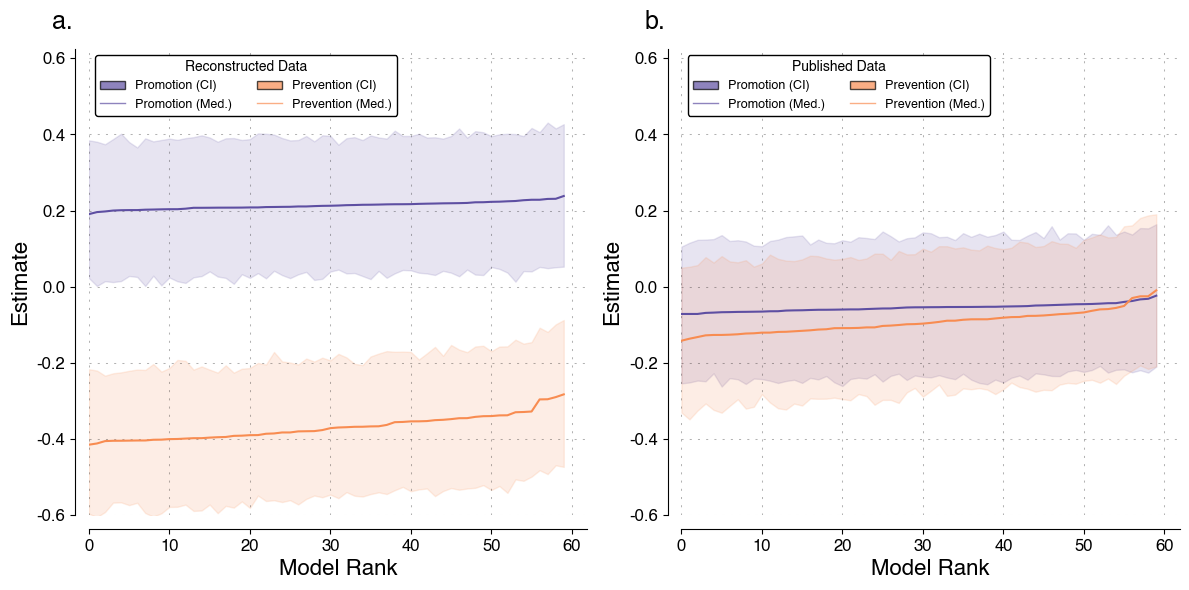

In [14]:
figure_plotter(gino_results_promo_published, gino_results_preven_published, gino_results_promo, gino_results_preven, 'gino_figure_1')